# Classification

## What is Classification
<div style="text-align:justify">
Classification consists in taking a vector of inputs X to produce a vector of outputs Y that will associate each input x to a class. The training data set is composed of the vector X of n observations (that can include b parameters), and Y the vector the associated true values. The algorithm will try to minimize a loss function in order to create a model that can predict the class of each x with a certain level of precision. During the training phase, the true output is already defined and is given to the algorithm so it can learn how to differenciate those classes. Once the model is trained, it is supposed to be able to correctly predict those output for new values.
<br><br>
An example of classification could be to predict the added value of a new client : small, average, important. The input could include the type of client (individual or company), the location of the store in which they made their first purchase, the amount of their first purchase, the day of the week... The model will transform the input vector in a value corresponding to one of the classes. During the training phase, you should take data that already exists. Here is a simple example of a classification model : 
</div>

#### 1. Training the model 
<center>
<img src="pictures/classificationTraining.png">
</center>

#### 2. Predict new values 
<center>
<img src="./pictures/classificationPredictions.png">
</center>

## How does a classification model work? 

<div style="text-align:justify">
Once the data is correclty collected, cleaned and formated, you can proceed to develop and train a classification model. There are several algorithm that will help you to do this task. However, it is important to understand how they work under the hood, and the right way to use them.
</div>

### The loss function

<div style="text-align:justify">
As specified in the graphs above, one of the main part of the training process consist in comparing the predicted values to the true output. <br>
For a classification problem, the loss can be defined as : 
</div>

$$

\mathcal{l}(Y,f(X)) = \sum_{i=1}^{n} 1_{Y_i \ne f(X_i)}

$$

### What are the mains challenges 

<div style="text-align:justify">
As classification greatly depends on the quality of the input, therefore the first challenge we encounter is to feed the model with the proper data and the right amount of information. Indeed, giving too much information to the model can lead to over-fitting, especially if the information is not independ. It will also take more time to train the model and to get precise results. On the other hand, by not giving enough data to the model, you won't be able to train it correctly and it will never reach a correct level of precision. 
</div>

## How to implement classification with python :

<div style="text-align:justify">
In this example, I choose to do imports as we go. This is supposed to help you understand in which situation and part of the process the different packages are useful. However, in reality, a good practice is to import all the packages in the first cell of the notebook. 
</div>

### 1. Load the data 

<div style="text-align:justify">
Pandas and numpy are the main packages used for loading/creating data sets. However, in a real case scenario, you might need a specific package to access a data base (boto3, sql...) or to do data transformation.
<br><br>
</div>

<div style="text-align:justify">
Then, download the data set : https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset?resource=download) and unzip the file and load it in python with pandas. As the data sets are from an external source, we will check that there are correctly splited.
</div>

```python
import pandas as pd 
import numpy as np 
```

```python
train = pd.read_csv("../datasets/loan/train.csv")
test = pd.read_csv("../datasets/loan/test.csv")

print(list(train.columns))
print(list(test.columns),"\n")

S1 = set(train["Loan_ID"])
S2 = set(test["Loan_ID"])

if S1.intersection(S2) != set():
    print("Error, there are common elements in train and test data sets : ", S1.intersection(S2))
else:
    print("Datasets are correctly splited")
```

<div style="text-align:justify">
Now that the data has been loaded and that we checked that the two datasets are different, we can do data exploration.
</div>

### 2. Clean and visualize the data 

<div style="text-align:justify">
We will import two libraries for data visualisation : seaborn and matplotlib are very common library used for data visualization. Other common are ggplot, altair ...
</div>

In [76]:
import matplotlib.pyplot as plt 
import seaborn as sns

<div style="text-align:justify">
First, let's look at the type of data. We will focuse on the train dataset. Some useful functions are head, info, isnull and describe. We see that Loan_ID is not a relevant field for our problem, therefre we can drop it immediatly. 
</div>

In [77]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [78]:
train.drop('Loan_ID',axis=1,inplace=True)
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [79]:
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<div style="text-align:justify">
As we can see, there are many null values. Keeping them like this would negatively affect the performance of the model, therefore we have to find a way to remove those values. One way to deal with such values is to simply remove the data entry. However, this reduces the size of the data set on which we will train the model. As a consequence, it is often better to find a way to replace null values by other values that are likely to be close to the truth. This can be done by inserting the most common value or the mode, the mean, a zero value... <br>
Here we will treat each cases differently : 
</div>

- Drop NA

<div style="text-align:justify">
For LoanAmount and Credit_History we can either replace the missing values by their means, or drop the entries with missing values. As both of those fields have an important standart deviations in comparison to their mean, it could create a significant noise to replace them by their mean (cf. describe table). Therefore, we will drop the lines with either a missing loan amount or loan amount term. We can do that with the dropna function by specifying the columns in which it should look for NA values. 
</div>

In [80]:
train = train.dropna(subset=['LoanAmount', 'Credit_History'])
train[['LoanAmount', 'Credit_History']].isnull().sum()

LoanAmount        0
Credit_History    0
dtype: int64

- Fill with the mean

<div style="text-align:justify">
For Loan_Amount_Term we can replace the missing values by the mean of this duration.
</div>

In [81]:
Mean_Amout_Term = int(train['Loan_Amount_Term'].mean())
print("Missing values will be replaced by : ",Mean_Amout_Term)
train['Loan_Amount_Term'].fillna(Mean_Amout_Term ,inplace=True)

Missing values will be replaced by :  342


- Fill with the mode

<div style="text-align:justify">
For other fields we can replace the missing values by their mode. This would make sense as their mean is close to this value. 
</div>

In [82]:
print("The mode of Gender history is : ",train['Self_Employed'].mode()[0]) 
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)

The mode of Gender history is :  No


Let's recount the missing values now : 

In [83]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             543 non-null    object 
 1   Married            543 non-null    object 
 2   Dependents         543 non-null    object 
 3   Education          543 non-null    object 
 4   Self_Employed      543 non-null    object 
 5   ApplicantIncome    543 non-null    int64  
 6   CoapplicantIncome  543 non-null    float64
 7   LoanAmount         543 non-null    float64
 8   Loan_Amount_Term   543 non-null    float64
 9   Credit_History     543 non-null    float64
 10  Property_Area      543 non-null    object 
 11  Loan_Status        543 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 55.1+ KB


In [85]:
train.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      455
CoapplicantIncome    252
LoanAmount           194
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

<div style="text-align:justify">
Those results are making sense, except for dependents that is an "object" (see train.info()) when it is supposed to be an integer. As we can see below, values above 3 are regrouped in a unique field "+3" that we can replace by "3" as in order to have only integer. 
</div>

In [86]:
train['Dependents'].value_counts()

0     319
2      92
1      86
3+     46
Name: Dependents, dtype: int64

In [87]:
train['Dependents'].replace('3+',3,inplace=True)
train['Dependents']=train['Dependents'].astype('int')
train['Dependents'].value_counts()

0    319
2     92
1     86
3     46
Name: Dependents, dtype: int64

<div style="text-align:justify">
Now that the trained dataset is cleaned, we can use data visualisation in order to get a better understanding of our working material. We will look for outsiders values, correlations...
</div>

##### 1. Outsiders

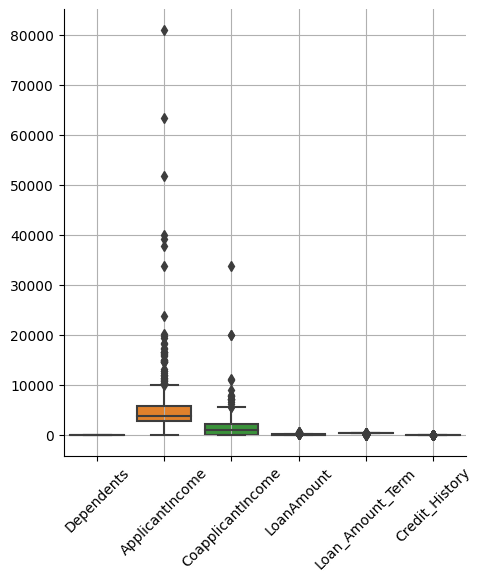

In [94]:
sns.catplot(data=train,kind='box')
plt.xticks(rotation=45)
plt.grid()
plt.show()

##### 2. Correlation

/var/folders/5w/k34nxpys5nxfvb9s2kv_4kr80000gn/T/ipykernel_81729/1603077357.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),annot=True)


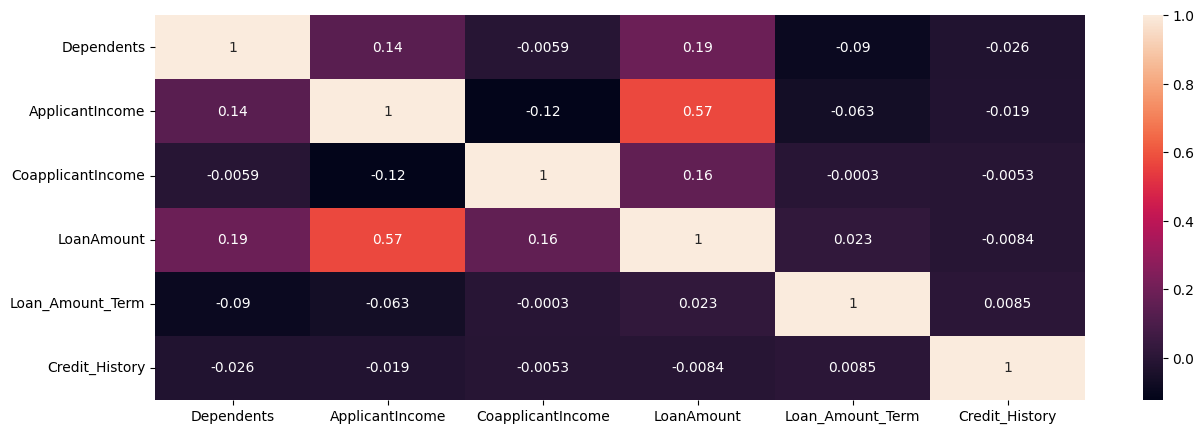

In [95]:
plt.figure(figsize=(15,5))
sns.heatmap(train.corr(),annot=True)
plt.show()

##### 3. Discrete values 

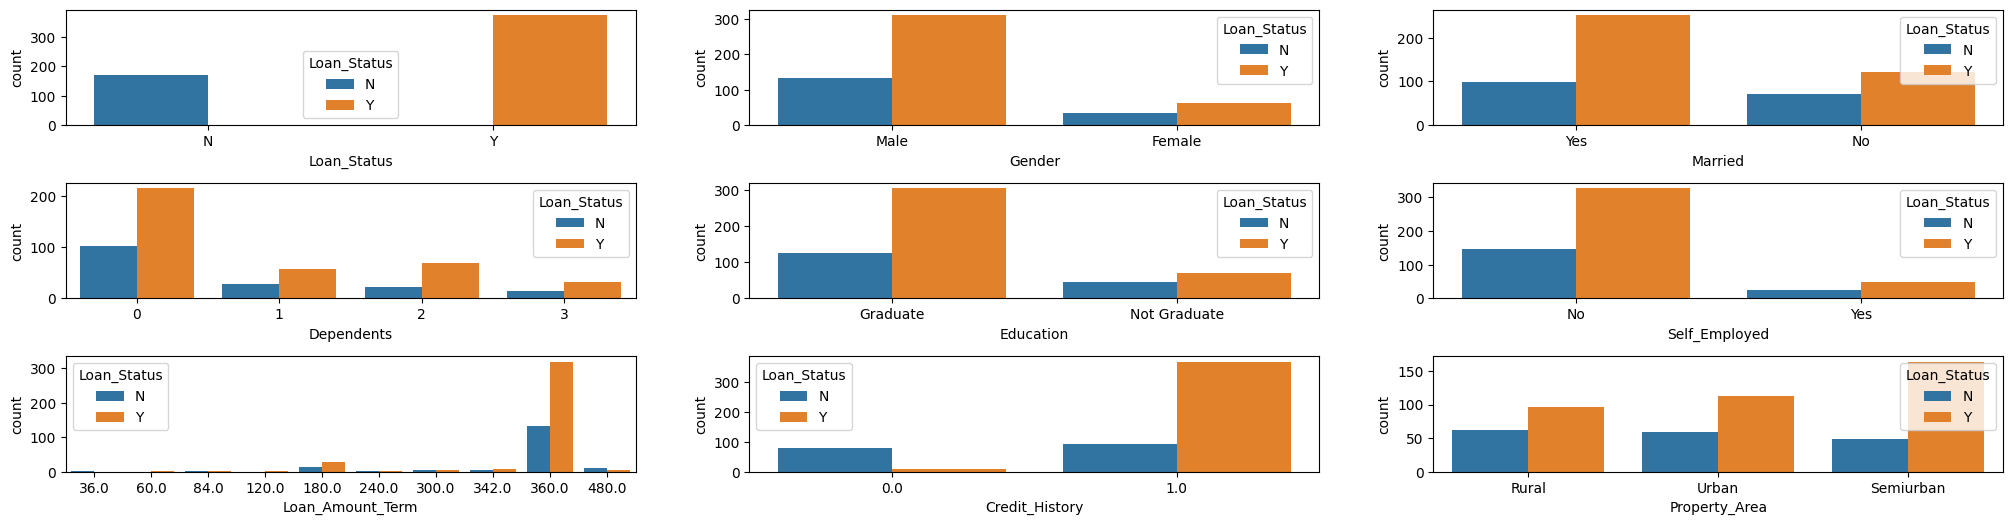

In [106]:
Discrete_Values = ['Loan_Status','Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']

fig, axs = plt.subplots(figsize=(25,6),ncols=3,nrows=3)
plt.subplots_adjust(hspace=0.5)

for column, ax in zip(Discrete_Values, axs.ravel()):
    sns.countplot(x=train[column],hue=train['Loan_Status'],ax=ax)

plt.show()

##### 4. Continous values 

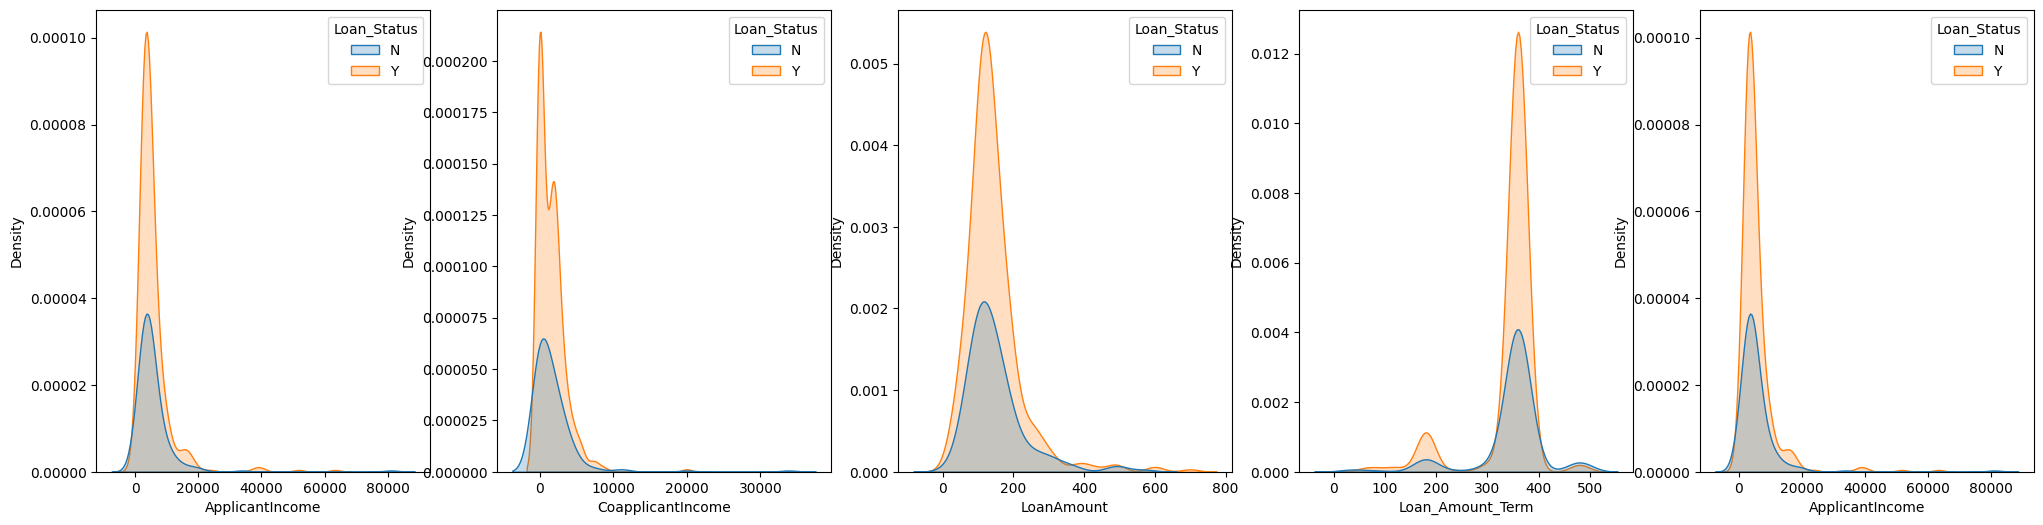

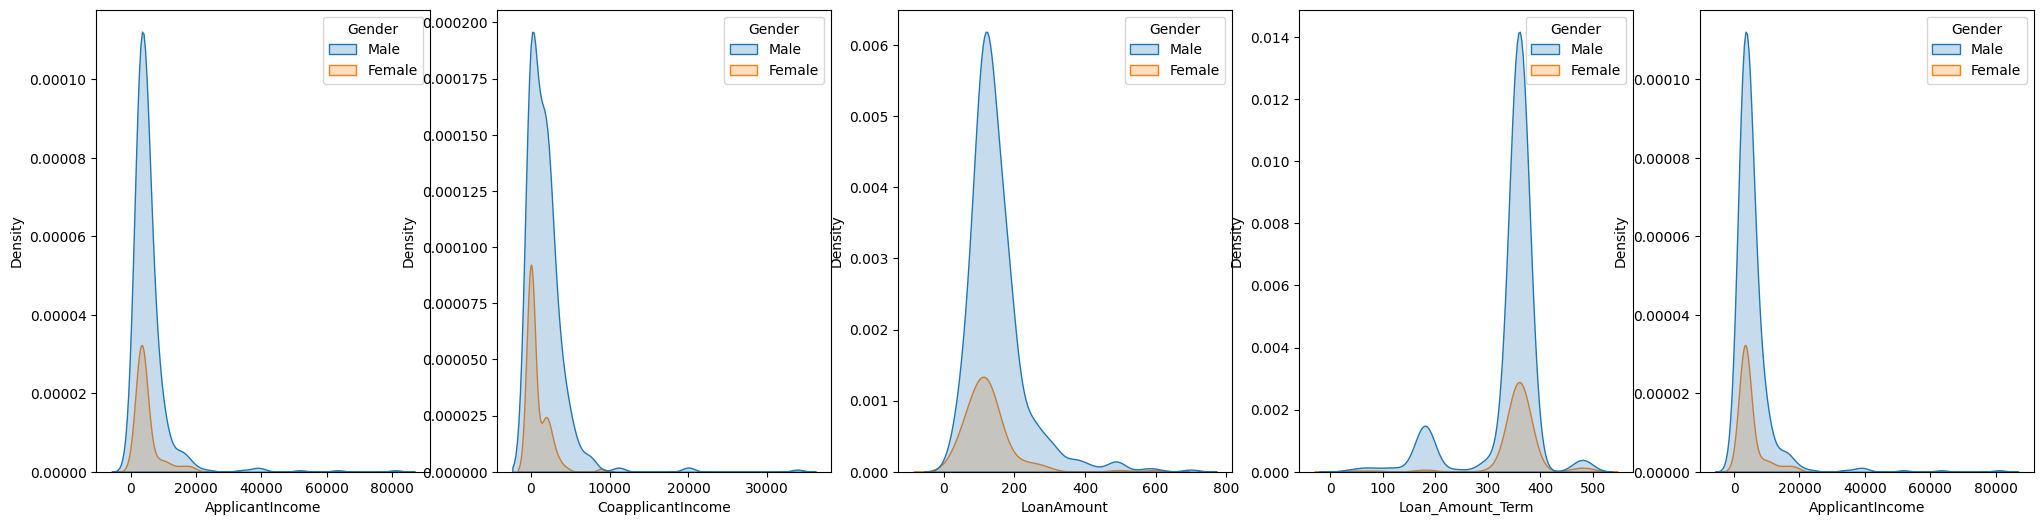

In [111]:
Continous_Values = ['ApplicantIncome','CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'ApplicantIncome']

fig, axs = plt.subplots(figsize=(25,6),ncols=5,nrows=1)
plt.subplots_adjust(hspace=0.5)

for column, ax in zip(Continous_Values, axs.ravel()):
    sns.kdeplot(x=train[column],hue=train['Loan_Status'],ax=ax,fill=True)
plt.show()

fig, axs = plt.subplots(figsize=(25,6),ncols=5,nrows=1)
plt.subplots_adjust(hspace=0.5)
for column, ax in zip(Continous_Values, axs.ravel()):
    sns.kdeplot(x=train[column],hue=train['Gender'],ax=ax,fill=True)
plt.show()


### 3. Create the model

### 4. Train the model

### 5. Make predictions 